In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('baseball.csv')


In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [5]:
df.loc[df.Team == 'STL'].RS.mean()

716.3191489361702

In [6]:
df.loc[(df.Team == 'STL') & (df.Year > 2005)].RS.mean()

754.0

In [7]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [10]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [11]:
data = df.dropna()

In [12]:
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402
18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 1 to 418
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          114 non-null    object 
 1   League        114 non-null    object 
 2   Year          114 non-null    int64  
 3   RS            114 non-null    int64  
 4   RA            114 non-null    int64  
 5   W             114 non-null    int64  
 6   OBP           114 non-null    float64
 7   SLG           114 non-null    float64
 8   BA            114 non-null    float64
 9   Playoffs      114 non-null    int64  
 10  RankSeason    114 non-null    float64
 11  RankPlayoffs  114 non-null    float64
 12  G             114 non-null    int64  
 13  OOBP          114 non-null    float64
 14  OSLG          114 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 14.2+ KB


<Axes: >

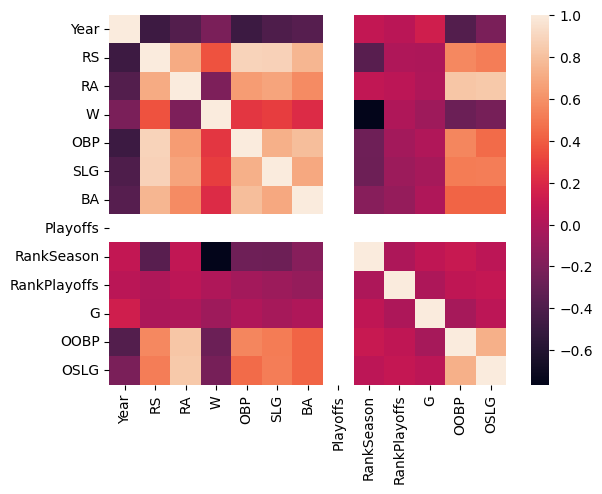

In [15]:
sns.heatmap(data.corr(numeric_only=True))

In [16]:
features = ['OBP','SLG','OOBP','OSLG']
X = data[features]
y = data['W']

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.188925833811231


In [23]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
print(f"Mean Cross-Validation MSE: {mean_cv_score}")

Mean Cross-Validation MSE: 16.119992868283425


In [24]:
import matplotlib.pyplot as plt

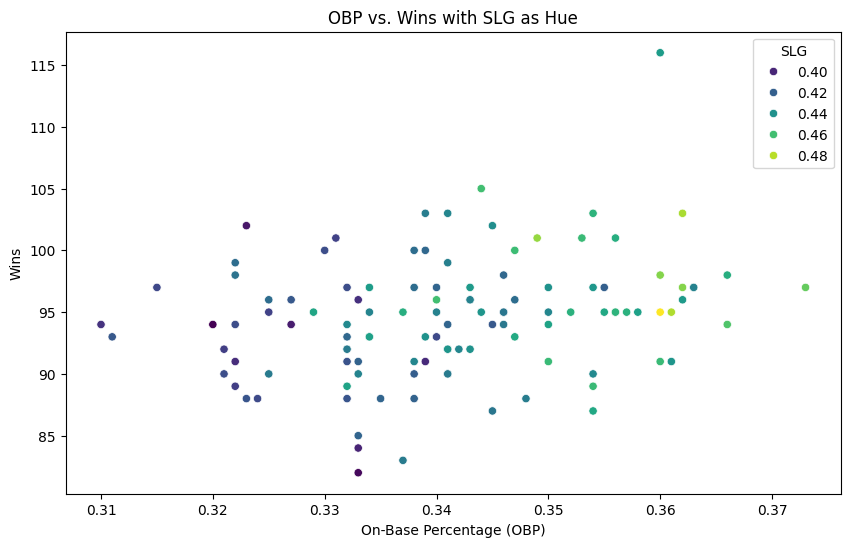

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='OBP', y='W', hue='SLG', palette='viridis')
plt.title('OBP vs. Wins with SLG as Hue')
plt.xlabel('On-Base Percentage (OBP)')
plt.ylabel('Wins')
plt.show()